## Data transformation, normalization, and standardization

### Data

In [ ]:
import pandas as pd
import numpy as np

In [5]:
data=pd.read_csv("Heart_disease_cleveland_new.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,0,110,264,0,0,132,0,1.2,1,0,3,1
299,68,1,3,144,193,1,0,141,0,3.4,1,2,3,1
300,57,1,3,130,131,0,0,115,1,1.2,1,1,3,1
301,57,0,1,130,236,0,2,174,0,0.0,1,1,1,1


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Outlier

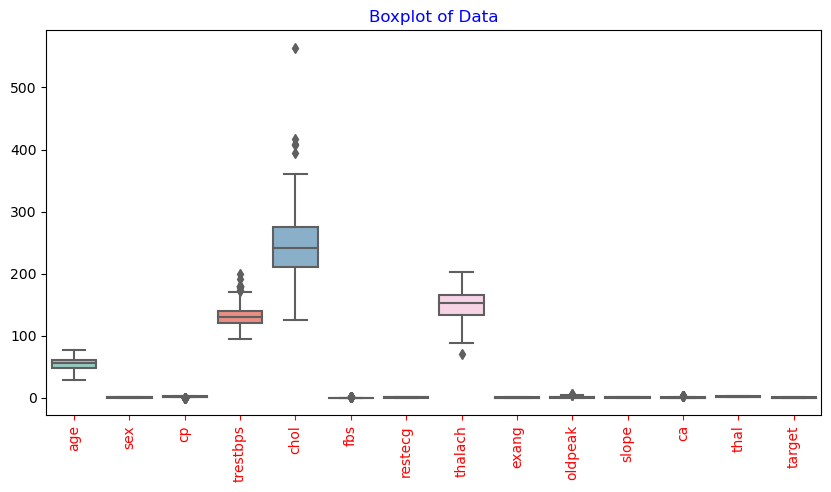

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=data, ax=ax, palette='Set3')
ax.set_title('Boxplot of Data', color='blue',)
ax.tick_params(axis='x', labelrotation=90, colors='red')
plt.show()

In [9]:
def plot_data(dataframe, feature):
    warnings.filterwarnings("ignore")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
    sns.boxplot(dataframe[feature], saturation=5.0, width=.25, ax=ax1)
    ax1.set_title('Box Plot of Data',color='blue',)
    ax1.set_xlabel(feature ,color='red')

    sns.distplot(dataframe[feature], kde=True, rug=True, color='blue',
                 kde_kws={"color": "red", "lw": 2, "alpha": 0.7},
                 hist_kws={"linewidth":.5, "alpha": 0.25}, ax=ax2)
    ax2.set_title('Distribution Plot of Data',color='blue',)
    ax2.set_xlabel(feature ,color='red')
    plt.show()

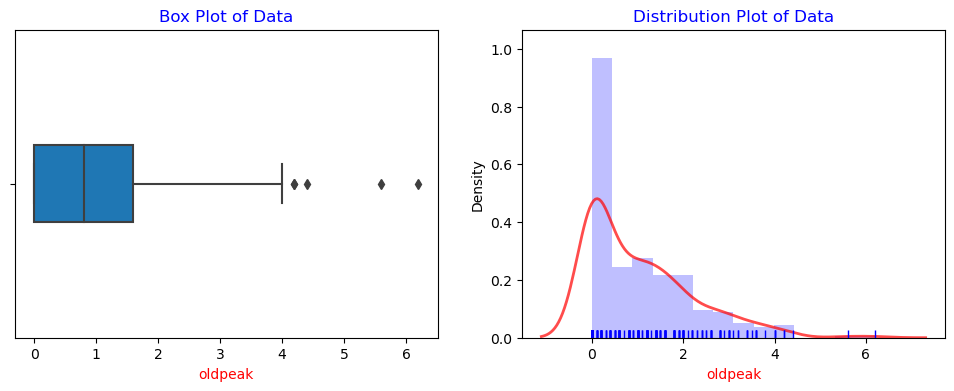

In [10]:
plot_data(data, "oldpeak")

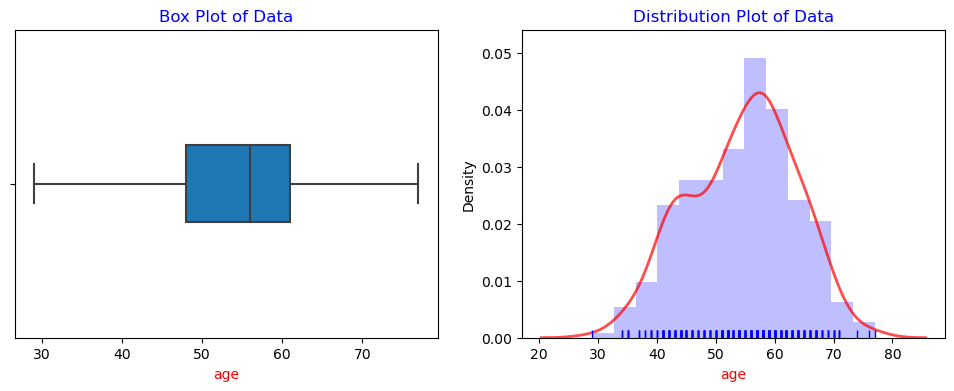

In [11]:
plot_data(data, "age")

### Methods of Data Transformation

### 1.log transformation 

#### Logarithmic transformation can be used to transform a skewed or non-normal distribution into a more symmetrical or normal distribution, which can make it easier to apply statistical tests or build models that assume a normal distribution. It can also be used to reduce the influence of outliers, since extreme values are often more strongly affected by the transformation.

In [12]:
data['oldpeak_log'] = np.log(data['oldpeak'])
data['oldpeak_log'].head(3)

0    0.832909
1    0.405465
2    0.955511
Name: oldpeak_log, dtype: float64

### 2.Box-cox Transformation

##### The Box-Cox transformation involves raising the original data to a power, which is determined by a parameter λ. This power transformation can take many different forms, depending on the value of λ. When λ is 0, the Box-Cox transformation reduces to a natural logarithm transformation, and when λ is 1, it is a simple linear transformation.

The optimal value of λ for a given dataset can be estimated using maximum likelihood estimation, which involves fitting a range of values for λ and selecting the value that maximizes the likelihood of the transformed data.  

In general, Box-Cox transformation is recommended for data that exhibit positive skewness, meaning that the distribution is skewed to the right, and the tail of the distribution is longer on the positive side. This can be checked by visual inspection of a histogram or by calculating the skewness statistic.

The Box-Cox transformation is most effective when the data have moderate to high skewness, but it may not be necessary for data with low skewness. In addition, the transformation is typically applied to continuous data, and may not be suitable for discrete data or data with a lot of zeros.

In [14]:
from scipy import stats
data1=pd.read_csv("Heart_disease_cleveland_new.csv")
data1
# Select the column to transform
column_to_transform = "thalach"

# Apply Box-Cox transformation with lambda=0.5
transformed_data = stats.boxcox(data1[column_to_transform], lmbda= 2.23)
#transformed_data, lambda_value = stats.boxcox(data1[column_to_transform])

# Replace the original column with the transformed values
data1[column_to_transform] = transformed_data



In [15]:
data1[column_to_transform]

0      31942.768045
1      15353.854747
2      22819.265245
3      52227.374077
4      43343.011225
           ...     
298    24019.662212
299    27825.742336
300    17662.016841
301    44474.961597
302    43906.974422
Name: thalach, Length: 303, dtype: float64

### 3.Square root transformation

##### Square root transformation is a type of data transformation that involves taking the square root of each value in a dataset. It is commonly used to stabilize variance and reduce the impact of extreme values in datasets with positive skewness.

When a dataset has positive skewness, the mean of the data tends to be larger than the median, and the tail of the distribution is longer on the positive side. This can lead to problems when applying statistical methods that assume the data are normally distributed or have equal variance. Square root transformation can help to address these issues by reducing the impact of extreme values and stabilizing the variance of the data.

In [16]:
# Apply square root transformation
data1[column_to_transform] = np.sqrt(data1["oldpeak"])

data1[column_to_transform]

0      1.516575
1      1.224745
2      1.612452
3      1.870829
4      1.183216
         ...   
298    1.095445
299    1.843909
300    1.095445
301    0.000000
302    0.000000
Name: thalach, Length: 303, dtype: float64

### 4.Reciprocal transformation

##### Reciprocal transformation is a type of data transformation that involves taking the reciprocal of each value in a dataset. The reciprocal of a number is simply 1 divided by that number, so the reciprocal transformation involves replacing each value x in a dataset with 1/x.

Reciprocal transformation is often used to transform data with positive skewness, since it can help to make the data more symmetric and closer to a normal distribution. The transformation has the effect of making small values larger and large values smaller, which can help to reduce the impact of extreme values on statistical analyses.

One important consideration when using reciprocal transformation is that it is not suitable for datasets that contain zero values, since the reciprocal of zero is not defined. Additionally, the transformation can be sensitive to extreme values, which can cause problems if the data contains outliers or extreme values.

In [17]:
data1["oldpeak_reci"] = 1 / data1["oldpeak"]
data1["oldpeak_reci"] 

0      0.434783
1      0.666667
2      0.384615
3      0.285714
4      0.714286
         ...   
298    0.833333
299    0.294118
300    0.833333
301         inf
302         inf
Name: oldpeak_reci, Length: 303, dtype: float64

### 5.Exponential transformation

#### Exponential transformation is a type of data transformation that involves taking the exponential function of each value in a dataset. The exponential function is a mathematical function that is defined as e^x, where e is a mathematical constant (approximately equal to 2.71828) and x is the value of the input to the function.

Exponential transformation can be useful for transforming data that has a skewed distribution, particularly when the skewness is due to the presence of large positive values. The transformation has the effect of compressing the range of values at the high end of the distribution, while expanding the range of values at the low end of the distribution. This can help to make the data more symmetric and closer to a normal distribution, which can improve the performance of statistical models and analyses.

It is important to note that exponential transformation can also have some drawbacks, particularly if the data contains negative values. The exponential function is only defined for positive values, so applying the transformation to a dataset that contains negative values can result in undefined values or errors. Additionally, the transformation can be sensitive to extreme values, which can cause problems if the data contains outliers or extreme values.

In [18]:
data1["oldpeak-exponen"] = np.exp(data1["oldpeak"])
data1["oldpeak-exponen"]

0       9.974182
1       4.481689
2      13.463738
3      33.115452
4       4.055200
         ...    
298     3.320117
299    29.964100
300     3.320117
301     1.000000
302     1.000000
Name: oldpeak-exponen, Length: 303, dtype: float64

# Normalization

### 1.min-max scaling

#### Min-max scaling is a type of data normalization technique used in machine learning and data analysis. It rescales the features of a dataset so that they have a minimum value of 0 and a maximum value of 1.

The formula for min-max scaling is:

scaled_value = (value - min_value) / (max_value - min_value)

where value is the original value of a feature, min_value is the minimum value of that feature, and max_value is the maximum value of that feature.

Min-max scaling is useful when the values of the features in a dataset have different ranges, and we want to rescale them to a common range for comparison. It is also useful when we want to prevent some features from dominating others due to their larger value range.

One potential drawback of min-max scaling is that it is sensitive to outliers. If a dataset contains extreme values (outliers), they can affect the scaling of the other features. In such cases, it might be better to use a more robust scaling technique, such as standardization or robust scaling.

In [32]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# separate the target variable (last column)
target = data.iloc[:, -1]

# select the features to be scaled
X = data.iloc[:, :-1]

# initialize the scaler
scaler = MinMaxScaler()

# fit and transform the features
scaled_features = scaler.fit_transform(X)

# create a new DataFrame with the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=X.columns)

# concatenate the target variable and the scaled features
df_scaled = pd.concat([df_scaled, target], axis=1)
df_scaled.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,oldpeak_log
0,0.708333,1.0,0.000000,0.481132,0.244292,1.0,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.5,0.0,0.832909
1,0.791667,1.0,1.000000,0.622642,0.365297,0.0,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.0,1.0,0.405465
2,0.791667,1.0,1.000000,0.245283,0.235160,0.0,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.0,1.0,0.955511
3,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.0,0.0,1.252763
4,0.250000,0.0,0.333333,0.339623,0.178082,0.0,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.0,0.0,0.336472


## Standardization 

### Z-score standardization 

#### Z-score standardization is a common technique used to standardize a dataset by subtracting the mean of each feature and then dividing by its standard deviation. The resulting values are transformed to have a mean of 0 and a standard deviation of 1, which is also known as the standard normal distribution.
Z-score standardization is a useful technique for comparing variables that have different scales, as it transforms all variables to a common scale. It is commonly used in machine learning algorithms that require standardized data as input, such as principal component analysis (PCA), linear regression, and logistic regression.

For example, if you have a dataframe with several columns, some of which represent categorical data or binary data, Z-score standardization may not be appropriate for those columns. It's generally more appropriate to apply Z-score standardization to continuous numerical data, such as age, income, or weight.

In [34]:

from sklearn.preprocessing import StandardScaler
# select columns to standardize
cols_to_standardize = ['age', 'trestbps', 'chol',"thalach"]

# apply Z-score standardization to selected columns
scaler = StandardScaler()
data[cols_to_standardize] = scaler.fit_transform(data[cols_to_standardize])
data[cols_to_standardize] .head()

,age,trestbps,chol,thalach
0,0.948726,0.757525,-0.264900,0.017197
1,1.392002,1.611220,0.760415,-1.821905
2,1.392002,-0.665300,-0.342283,-0.902354
3,-1.932564,-0.096170,0.063974,1.637359
4,-1.489288,-0.096170,-0.825922,0.980537


### 2.RobustScaler

#### RobustScaler is a method of scaling data that is similar to standardization. It is a type of feature scaling that is more robust to the presence of outliers in the data compared to other scaling methods like MinMaxScaler or StandardScaler.

Like standardization, RobustScaler scales the features to have a mean of 0 and a standard deviation of 1. However, instead of using the mean and standard deviation of the entire dataset, RobustScaler uses the median and interquartile range (IQR) to scale the data.

The interquartile range (IQR) is defined as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. It is used as a measure of the spread of the middle 50% of the data, and is less sensitive to outliers than the standard deviation.
RobustScaler is a good choice for data that contains outliers, since it is less sensitive to their influence on the scaling of the data.

Robust scaling is typically used to scale features that have a lot of outliers or are not normally distributed. Therefore, if there are columns in the dataset that do not have outliers or have a normal distribution, it may not be necessary to apply robust scaling to those columns.

In [43]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

data2 = pd.read_csv("Heart_disease_cleveland_new.csv")
dat = data2[['trestbps', 'chol', 'thalach']]

# create an instance of RobustScaler
scaler = RobustScaler()

# fit and transform the data
scaled_data = scaler.fit_transform(dat)

# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=['trestbps', 'chol', 'thalach'])
df_scaled.head()

,trestbps,chol,thalach
0,0.75,-0.125000,-0.092308
1,1.50,0.703125,-1.384615
2,-0.50,-0.187500,-0.738462
3,0.00,0.140625,1.046154
4,0.00,-0.578125,0.584615
